<a href="https://colab.research.google.com/github/Aristokitten/Aristokitten/blob/main/VeronikaSpielmann_Pinguine_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Veronika Spielmann**, Data Exploration Project 🎓, Archipelago Penguins 🐧

# I. Notebook Set-Up

## Installations

In [3]:
!pip install -U matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install gdown


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [5]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gdown
from typing import Any, Dict, Tuple
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

# II. Data and Model Preparation

## Load and join datasets

In [10]:
def read_and_join_data(size_url: str, lter_url: str) -> pd.DataFrame:
    """
    Read the penguin data from two CSV files and join them into a single DataFrame.
    
    :param size_url: The file URL for the penguins_size.csv file.
    :param lter_url: The file URL for the penguins_lter.csv file.
    :return: The joined DataFrame containing both penguins_size and penguins_lter data.
    """
    # Read the data from the CSV files.
    size_content = requests.get(size_url).content
    lter_content = requests.get(lter_url).content
    df_penguins_size = pd.read_csv(io.StringIO(size_content.decode('utf-8')))
    df_penguins_lter = pd.read_csv(io.StringIO(lter_content.decode('utf-8')))

    # Join the two dataframes.
    df_penguins_total = df_penguins_size.join(df_penguins_lter)

    return df_penguins_total

# Applying the function:
size_url = "https://drive.google.com/uc?export=download&id=14QKYDqBMbxGJcjAojhM5q6F112EQC4AA"
lter_url = "https://drive.google.com/uc?export=download&id=1VSlUARVljc2eTJHGPzKMmueHJhCV0Caj"
df_penguins_total = read_and_join_data(size_url, lter_url)
df_penguins_total


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),...,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,...,NaN,NaN,Not enough blood for isotopes.,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,...,8.94956,-24.69454,NaN,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,...,8.36821,-25.33302,NaN,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,...,NaN,NaN,Adult not sampled.,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,...,8.76651,-25.32426,NaN,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,...,NaN,NaN,NaN,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,...,8.41151,-26.13832,NaN,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,...,8.30166,-26.04117,NaN,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,...,8.24246,-26.11969,NaN,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Data preprocessing

### Remove unnecessary columns

In [11]:
def remove_columns(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Remove specified columns from a DataFrame.

    :param df: The input DataFrame.
    :param columns: A list of columns to remove from the DataFrame.
    :return: The DataFrame with specified columns removed.
    """
    df_reduced = df.drop(columns=columns, axis=1)
    return df_reduced

# Applying the function:
columns_remove = ['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID', 'Culmen Length (mm)', 'Culmen Depth (mm)', 
                  'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments', 'Body Mass (g)', 'Sex', 'Region', 'Stage']
df_penguins_total_reduced = remove_columns(df_penguins_total, columns_remove)
df_penguins_total_reduced

,Clutch Completion,Date Egg,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Yes,11/11/07,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Yes,11/11/07,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Yes,11/16/07,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Yes,11/16/07,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Yes,11/16/07,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...,...,...
339,No,12/1/09,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Yes,11/22/09,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Yes,11/22/09,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Yes,11/22/09,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Remove rows with missing values

In [12]:
def handle_missing_values(df: pd.DataFrame, remove: bool = True) -> pd.DataFrame:
    """
    Count and print the number of missing values per column and the total number of rows with at least one NaN value.
    Optionally, remove rows with missing data and invalid 'sex' values from the DataFrame.

    :param df: The input DataFrame.
    :param remove: A boolean indicating whether to remove rows with missing data (default=True).
    :return: The cleaned DataFrame with missing data and invalid 'sex' values removed (if remove=True), or the original DataFrame.
    """
    # Count missing values
    missing_values_per_column = df.isna().sum()
    print("---- Missing values per column:\n", missing_values_per_column)

    # Count rows with at least one NaN value
    rows_with_nan = df.isna().any(axis=1).sum()
    print("-> Amount of rows containing at least one NaN value:", rows_with_nan)

    # If the 'remove' parameter is True, remove rows with missing data and invalid 'sex' values
    if remove:
        # Remove rows with any missing values
        df_clean = df.dropna()

        # Remove rows with invalid 'sex' values
        df_clean = df_clean[df_clean["sex"] != "."]
        
        # Return the cleaned DataFrame        
        return df_clean

    return df

# Applying the function to count missing values
handle_missing_values(df_penguins_total_reduced, remove=False)

# Applying the function to remove missing values
df_penguins_total_clean = handle_missing_values(df_penguins_total_reduced)
df_penguins_total_clean



---- Missing values per column:
 Clutch Completion     0
Date Egg              0
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
-> Amount of rows containing at least one NaN value: 10
---- Missing values per column:
 Clutch Completion     0
Date Egg              0
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
-> Amount of rows containing at least one NaN value: 10


,Clutch Completion,Date Egg,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Yes,11/11/07,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Yes,11/11/07,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Yes,11/16/07,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Yes,11/16/07,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Yes,11/16/07,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...,...,...
338,No,12/1/09,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Yes,11/22/09,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Yes,11/22/09,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Yes,11/22/09,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Remove unnecessary columns

In [13]:
# Applying the existing function
columns_remove = ['island', 'body_mass_g', 'Clutch Completion', 'Date Egg']
df_penguins_relevant = remove_columns(df_penguins_total_clean, columns_remove)
df_penguins_relevant

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,Adelie,39.1,18.7,181.0,MALE
1,Adelie,39.5,17.4,186.0,FEMALE
2,Adelie,40.3,18.0,195.0,FEMALE
4,Adelie,36.7,19.3,193.0,FEMALE
5,Adelie,39.3,20.6,190.0,MALE
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,FEMALE
340,Gentoo,46.8,14.3,215.0,FEMALE
341,Gentoo,50.4,15.7,222.0,MALE
342,Gentoo,45.2,14.8,212.0,FEMALE


## Feature Engineering and Model Preparation

### Conversion of penguin sex from categorical to numerical value

In [14]:
def convert_sex_labels(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convert categorical sex labels to numerical values in the input DataFrame.

    :param df: The input DataFrame.
    :return: The modified DataFrame with numerical sex labels.
    """
    df_encoded = df.copy()
    
    # Replace categorical gender values with numerical values
    df_encoded['sex'] = df_encoded['sex'].map({'MALE': 0, 'FEMALE': 1})

    return df_encoded

# Applying the function
df_penguins_engineered_1 = convert_sex_labels(df_penguins_relevant)
df_penguins_engineered_1

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,Adelie,39.1,18.7,181.0,0
1,Adelie,39.5,17.4,186.0,1
2,Adelie,40.3,18.0,195.0,1
4,Adelie,36.7,19.3,193.0,1
5,Adelie,39.3,20.6,190.0,0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,1
340,Gentoo,46.8,14.3,215.0,1
341,Gentoo,50.4,15.7,222.0,0
342,Gentoo,45.2,14.8,212.0,1


### Creation of interaction features

In [15]:
def create_interaction_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create interaction features by multiplying and calculating ratios of body characteristics.

    :param df: The input DataFrame.
    :return: The modified DataFrame with interaction features.
    """
    df_engineered = df.copy()

    # Create interaction features
    df_engineered['CD_FL'] = df_engineered['culmen_depth_mm'] * df_engineered['flipper_length_mm']
    df_engineered['CL_FL'] = df_engineered['culmen_length_mm'] * df_engineered['flipper_length_mm']
    df_engineered['CD_CL'] = df_engineered['culmen_depth_mm'] * df_engineered['culmen_length_mm']
    df_engineered['CD_CL_FL'] = df_engineered['culmen_depth_mm'] * df_engineered['culmen_length_mm'] * df_engineered['flipper_length_mm']
    df_engineered['CD_FL_ratio'] = df_engineered['culmen_depth_mm'] / df_engineered['flipper_length_mm']
    df_engineered['CL_FL_ratio'] = df_engineered['culmen_length_mm'] / df_engineered['flipper_length_mm']
    df_engineered['CD_CL_ratio'] = df_engineered['culmen_depth_mm'] / df_engineered['culmen_length_mm']

    return df_engineered

# Applying the function
df_penguins_engineered_2 = create_interaction_features(df_penguins_engineered_1)
df_penguins_engineered_2

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,CD_FL,CL_FL,CD_CL,CD_CL_FL,CD_FL_ratio,CL_FL_ratio,CD_CL_ratio
0,Adelie,39.1,18.7,181.0,0,3384.7,7077.1,731.17,132341.77,0.103315,0.216022,0.478261
1,Adelie,39.5,17.4,186.0,1,3236.4,7347.0,687.30,127837.80,0.093548,0.212366,0.440506
2,Adelie,40.3,18.0,195.0,1,3510.0,7858.5,725.40,141453.00,0.092308,0.206667,0.446650
4,Adelie,36.7,19.3,193.0,1,3724.9,7083.1,708.31,136703.83,0.100000,0.190155,0.525886
5,Adelie,39.3,20.6,190.0,0,3914.0,7467.0,809.58,153820.20,0.108421,0.206842,0.524173
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,1,2931.8,10100.8,646.64,138380.96,0.064019,0.220561,0.290254
340,Gentoo,46.8,14.3,215.0,1,3074.5,10062.0,669.24,143886.60,0.066512,0.217674,0.305556
341,Gentoo,50.4,15.7,222.0,0,3485.4,11188.8,791.28,175664.16,0.070721,0.227027,0.311508
342,Gentoo,45.2,14.8,212.0,1,3137.6,9582.4,668.96,141819.52,0.069811,0.213208,0.327434


### One-Hot encoding the penguin species

In [16]:
def one_hot_encoding(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create dummy variables for species and concatenate them to the original DataFrame.

    :param df: The input DataFrame.
    :return: The modified DataFrame with dummy variables.
    """
    # Create dummy variables for species
    species_encoded = pd.get_dummies(df['species'], prefix='species')
    df_hot = df.copy()
    
    # Concatenate dummy variables to the original DataFrame
    df_hot = pd.concat([df_hot, species_encoded], axis=1)

    return df_hot

# Applying the function 
df_penguins_engineered_3 = one_hot_encoding(df_penguins_engineered_2)
df_penguins_engineered_3
# Removing the original species column
columns_remove = ['species']
df_penguins_engineered_3 = remove_columns(df_penguins_engineered_3, columns_remove)
df_penguins_engineered_3

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,CD_FL,CL_FL,CD_CL,CD_CL_FL,CD_FL_ratio,CL_FL_ratio,CD_CL_ratio,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,0,3384.7,7077.1,731.17,132341.77,0.103315,0.216022,0.478261,1,0,0
1,39.5,17.4,186.0,1,3236.4,7347.0,687.30,127837.80,0.093548,0.212366,0.440506,1,0,0
2,40.3,18.0,195.0,1,3510.0,7858.5,725.40,141453.00,0.092308,0.206667,0.446650,1,0,0
4,36.7,19.3,193.0,1,3724.9,7083.1,708.31,136703.83,0.100000,0.190155,0.525886,1,0,0
5,39.3,20.6,190.0,0,3914.0,7467.0,809.58,153820.20,0.108421,0.206842,0.524173,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,1,2931.8,10100.8,646.64,138380.96,0.064019,0.220561,0.290254,0,0,1
340,46.8,14.3,215.0,1,3074.5,10062.0,669.24,143886.60,0.066512,0.217674,0.305556,0,0,1
341,50.4,15.7,222.0,0,3485.4,11188.8,791.28,175664.16,0.070721,0.227027,0.311508,0,0,1
342,45.2,14.8,212.0,1,3137.6,9582.4,668.96,141819.52,0.069811,0.213208,0.327434,0,0,1


### Standardization of Features

In [17]:
def standardize_features(df: pd.DataFrame, features: list) -> pd.DataFrame:
    """
    Standardize specified features in the input DataFrame.

    :param df: The input DataFrame.
    :param features: A list of features to be standardized.
    :return: The modified DataFrame with standardized features.
    """
    # Standardize the specified features
    scaler = StandardScaler()
    df_standardized = df.copy()
    df_standardized[features] = scaler.fit_transform(df[features])

    return df_standardized

# Applying the function
features_to_standardize = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'CD_FL', 'CL_FL', 'CD_CL', 'CD_CL_FL', 'CD_FL_ratio', 'CL_FL_ratio', 'CD_CL_ratio']
df_penguins_standardized = standardize_features(df_penguins_engineered_3, features_to_standardize)
df_penguins_standardized

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,CD_FL,CL_FL,CD_CL,CD_CL_FL,CD_FL_ratio,CL_FL_ratio,CD_CL_ratio,species_Adelie,species_Chinstrap,species_Gentoo
0,-0.896042,0.780732,-1.426752,0,-0.149799,-1.152268,-0.185837,-0.724667,1.238822,-0.127224,1.058401,1,0,0
1,-0.822788,0.119584,-1.069474,1,-0.603436,-0.980816,-0.564930,-0.895898,0.531818,-0.299011,0.561784,1,0,0
2,-0.676280,0.424729,-0.426373,1,0.233482,-0.655890,-0.235697,-0.378279,0.442003,-0.566753,0.642598,1,0,0
4,-1.335566,1.085877,-0.569284,1,0.890843,-1.148456,-0.383376,-0.558831,0.998854,-1.342470,1.684847,1,0,0
5,-0.859415,1.747026,-0.783651,0,1.469283,-0.904587,0.491727,0.091895,1.608458,-0.558511,1.662321,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.587352,-1.762145,0.931283,1,-1.535181,0.768511,-0.916285,-0.495071,-1.605853,0.086007,-1.414606,0,0,1
340,0.514098,-1.457000,1.002739,1,-1.098674,0.743863,-0.720992,-0.285759,-1.425388,-0.049596,-1.213335,0,0,1
341,1.173384,-0.744994,1.502928,0,0.158233,1.459653,0.333591,0.922353,-1.120689,0.389801,-1.135039,0,0,1
342,0.221082,-1.202712,0.788372,1,-0.905657,0.439202,-0.723411,-0.364344,-1.186521,-0.259455,-0.925555,0,0,1


### Splitting the dataset

In [18]:
def split_dataset(df: pd.DataFrame, target_column: str, test_size: float, val_size: float, random_state: int = 42):
    """
    Split the input DataFrame into training, validation, and test sets.

    :param df: The input DataFrame.
    :param target_column: The target column to be predicted.
    :param test_size: The proportion of the dataset to include in the test set.
    :param val_size: The proportion of the dataset to include in the validation set.
    :param random_state: The random state for reproducibility.
    :return: The X_train, X_val, X_test, y_train, y_val, y_test DataFrames.
    """
    # Prepare data
    X = df.drop([target_column], axis=1)
    y = df[target_column]

    # Split the dataset into a training set and a temporary set
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size + val_size, random_state=random_state)

    # Calculate the proportion of validation set from the combined validation and test sets
    val_proportion = val_size / (test_size + val_size)

    # Split the temporary set into a validation set and a test set
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1 - val_proportion, random_state=random_state)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Applying the function
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(df_penguins_standardized, 'sex', test_size=0.15, val_size=0.15)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 233
Validation set size: 50
Test set size: 50


# III. Model Evaluation

## Load best model

In [8]:
url = 'https://drive.google.com/u/0/uc?id=1-tveOv2CwUYVI4zp8LCd9Z9XfllYXYAS&export=download'
output = '/content/best_knn_model.pkl'

gdown.download(url, output, quiet=False)

with open(output, 'rb') as file:
    best_knn_model = pickle.load(file)

Downloading...
From: https://drive.google.com/u/0/uc?id=1-tveOv2CwUYVI4zp8LCd9Z9XfllYXYAS&export=download
To: /content/best_knn_model.pkl
100%|██████████| 31.1k/31.1k [00:00<00:00, 56.1MB/s]


## Demo of best kNN model: classification of penguin sex

### Model performance

In [22]:
# Function to evaluate the best kNN model on the test data
def test_best_knn_model(best_knn_model: KNeighborsClassifier, X_test: pd.DataFrame, y_test: pd.Series) -> Tuple[float, float, float, float]:
    """
    Evaluate the best kNN model on the test data.
    
    :param best_knn_model: The trained best kNN model.
    :param X_test: The test data features.
    :param y_test: The test data target labels, i.e. penguin sex.
    :return: Test accuracy, precision, recall, and F1 score.
    """
    # Predict the test set labels
    y_test_pred = best_knn_model.predict(X_test)

    # Calculate evaluation metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')

    return test_accuracy, test_precision, test_recall, test_f1

# Call the test_best_knn_model function with the loaded model and test data
test_accuracy, test_precision, test_recall, test_f1 = test_best_knn_model(best_knn_model, X_test, y_test)

# Print evaluation metrics for the best model
print("Metrics on test data using the best model:")
print(f"Test Accuracy: {test_accuracy:.4f}\nTest Precision: {test_precision:.4f}\nTest Recall: {test_recall:.4f}\nTest F1 Score: {test_f1:.4f}")

Metrics on test data using the best model:
Test Accuracy: 0.8800
Test Precision: 0.9057
Test Recall: 0.8800
Test F1 Score: 0.8800


### Visualization of classification results

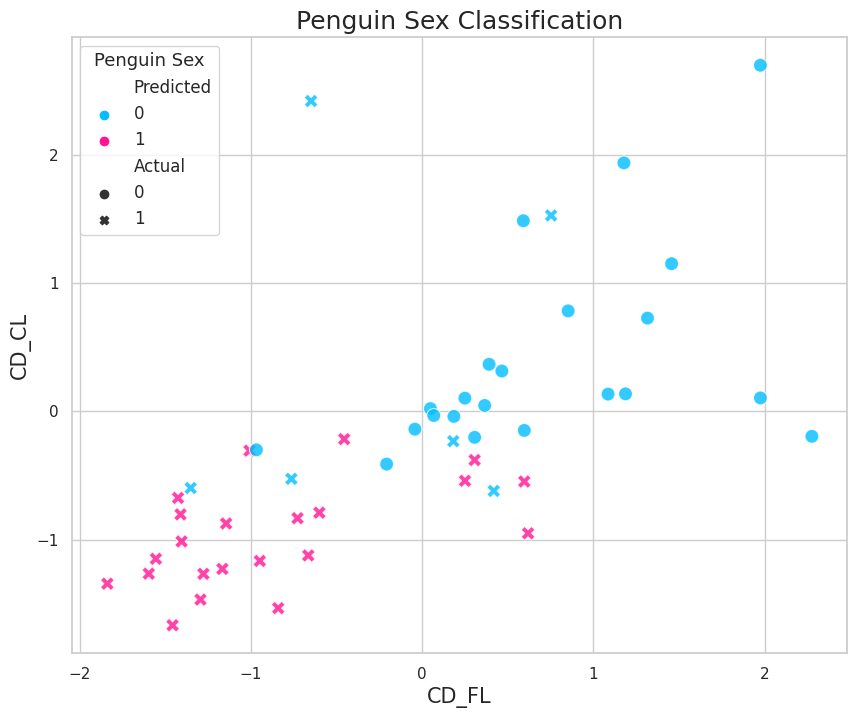

In [23]:
# Call the plot_classification_results function with the test data and model predictions
def plot_classification_results(X_test: pd.DataFrame, y_test: pd.Series, y_test_pred: pd.Series, feature_x: str, feature_y: str, title: str = "Penguin Sex Classification") -> None:
    """
    Create a scatter plot showing the classification of penguins based on two features, with different markers for actual and predicted classes.
    
    :param X_test: The test data features.
    :param y_test: The test data target labels, i.e. penguin sex.
    :param y_test_pred: The predicted test data target labels, i.e. penguin sex.
    :param feature_x: The name of the feature to be plotted on the x-axis.
    :param feature_y: The name of the feature to be plotted on the y-axis.
    :param title: The title of the plot (default: "Penguin Sex Classification").
    """
    # Create a DataFrame with actual and predicted classes
    data = X_test.copy()
    data["Actual"] = y_test
    data["Predicted"] = y_test_pred

    # Set plot style
    sns.set(style="whitegrid")

    # Define custom color palette
    custom_palette = {0: "deepskyblue", 1: "deeppink"}

    # Create scatter plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=feature_x, y=feature_y, hue="Predicted", style="Actual", data=data, palette=custom_palette, s=100, alpha=0.8)

    # Customize plot appearance
    plt.title(title, fontsize=18)
    plt.xlabel(feature_x, fontsize=15)
    plt.ylabel(feature_y, fontsize=15)
    plt.legend(title="Penguin Sex", title_fontsize=13, fontsize=12)

    # Show plot
    plt.show()

# Applying the function
feature_x = "CD_FL"  
feature_y = "CD_CL" 
plot_classification_results(X_test, y_test, best_knn_model.predict(X_test), feature_x, feature_y)

### Visualization of model performance with confusion matrix

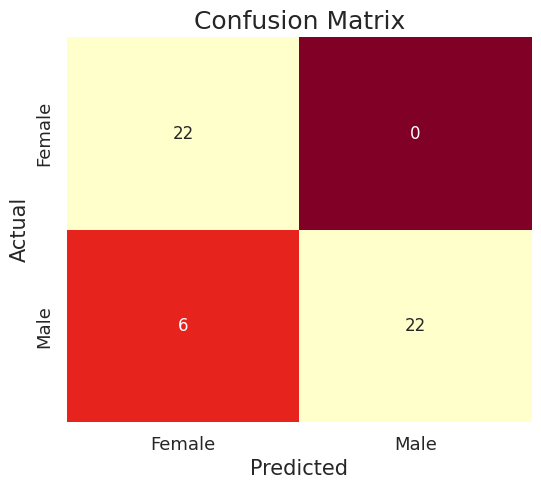

In [24]:
# Call the plot_confusion_matrix_heatmap function with the test data and model predictions
def plot_confusion_matrix_heatmap(y_true: pd.Series, y_pred: pd.Series, title: str = "Confusion Matrix") -> None:
    """
    Create a heatmap of the confusion matrix.

    :param y_true: The true labels.
    :param y_pred: The predicted labels.
    :param title: The title of the heatmap (default: "Confusion Matrix").
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Set plot style
    sns.set(style="white")

    # Create heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrRd_r", cbar=False, xticklabels=["Female", "Male"], yticklabels=["Female", "Male"])

    # Customize plot appearance
    plt.title(title, fontsize=18)
    plt.xlabel("Predicted", fontsize=15)
    plt.ylabel("Actual", fontsize=15)
    plt.tick_params(axis="both", which="major", labelsize=13)

    # Show plot
    plt.show()

# Applying the function
y_test_pred = best_knn_model.predict(X_test)
plot_confusion_matrix_heatmap(y_test, y_test_pred)